# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [24]:
import pandas as pd
import numpy as np
from scipy import stats

In [25]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [26]:
# number of callbacks for black-sounding names
bcalls = sum(data[data.race=='b'].call)

# number of callbacks for white-sounding names
wcalls = sum(data[data.race=='w'].call)

print ('The number of callbacks that black-sounds names receive is %d' %bcalls, \
       ' while the number of callbacks that white-sounding names receive is %d' %wcalls)

The number of callbacks that black-sounds names receive is 157  while the number of callbacks that white-sounding names receive is 235


In [27]:
w = data[data.race=='w']
b = data[data.race=='b']

print ('The number of datapoints with black-sounding names is %d' %len(b),\
       ' and the number of data points with white-sounding names is %d' %len(w))

The number of datapoints with black-sounding names is 2435  and the number of data points with white-sounding names is 2435


In [28]:
yesw = len(w[w['call'] == 1.0])
now = len(w[w['call'] == 0.0])

yesb = len(b[b['call'] == 1.0])
nob = len(b[b['call'] == 0.0])

print ('The number of callbacks that white-sounding names receive is %d' %yesw, ' with the total of %d' %now,\
       ' white-sounding names did not receive anything.')
print ('Meanwhile, the number of callbacks that black-sounding names receive is %d' %yesb,\
       ' with the corresponding %d' %nob ,'number of black-sounding names that did not receive a callback.')

The number of callbacks that white-sounding names receive is 235  with the total of 2200  white-sounding names did not receive anything.
Meanwhile, the number of callbacks that black-sounding names receive is 157  with the corresponding 2278 number of black-sounding names that did not receive a callback.


### Q1: What test is appropriate for this problem? Does CLT apply?

The most appropriate test for this problem is a two-sample binomial test since there are two different groups that are involved in this problem with each group has two different categorical results (receive a callback or do not receive a call back). In other words, we would need to conduct a two-sample two-tailed z-test to determine if there is a difference in the proportion of success between the two groups.This problem can also be solved as a two-tailed one-sample z-test by examining the statistics based on the difference between the callbacks among two groups. 

Another method that can be used to examine the racial discrimination between black- and white-sounding names for callbacks for job interviews is boostrap hypothesis test or permutation test. 

The central limit theorem can be applied when the number of sucess and the number of failure are at least 10. In addition, all obervations are independent from each other and the sample was collected randomly. In this case, the number of sucess and failures for both groups are significantly larger than 10 and therefore the central limit theorem is applied for this dichotomous senerio of the two groups. 

### Q2: What are the null and alternate hypotheses?
In this case, the null hypothesis is to assume that there is no racial discrimination and the number of callbacks between two groups would be the same. The alternate hypothesis is that the number of callbacks that black-sounding names receive is different from the number of callbakcs that white-sounding names receive from their employers. 

### Q3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.


#### Step 1: Frequentist statistical approach

In [29]:
#Set alpha value for statistic analysis 
alpha = 0.05 

#calculate the proportion of success for black-sounding names:
prop_b = yesb/len(b)

#calculate the proportion of sucess for white-sounding names:
prop_w = yesw/len(w)

#Calculate proportion difference and the margin of error
prop = prop_w - prop_b
moe = np.sqrt(prop_b*(1-prop_b)/len(b) + prop_w*(1-prop_w)/len(w))

#95% confidence interval
low = round(prop + stats.norm.ppf(0.975)*moe, 4)
high = round(prop + stats.norm.ppf(0.025)*moe, 4)

#statistic z-score
p_hat = len(data[data.call == 1.0])/len(data)
z_stat = (prop - 0)/(np.sqrt(p_hat*(1-p_hat)*(1/len(w)+1/len(b))))
p_val = stats.norm.sf(abs(z_stat))*2

print ('The statistical z-score is %f' %z_stat, ' and the corresponding p-value for this z-score is %6.7f' %p_val)

The statistical z-score is 4.108412  and the corresponding p-value for this z-score is 0.0000398


In comparison, the obtained p-value is much less than alpha-0.05 and thus the null hypothesis is rejected. Hence, based on this statistical analysis with a significance level of 5%, we can conclude that there is a difference in the number of callbacks that black-sounding names receive versus the number of callbacks that white-sounding names receive. 

#### Step 2: Bootstrap approach

In [30]:
import pandas as pd 

def draw_bs_replicates(data, func, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data['call'], len(data))
        rep = func(bs_sample)
        bs_replicates[i] = rep
    return bs_replicates

def prop_call(array):
    data = pd.DataFrame(array, columns=['call'])
    n = len(data)
    yes = len(data[data['call'] == 1.0])
    return yes/n

In [31]:
#Check the number of successful trials, did receive a callback, from the entire dataset
len(data[data.call == 1.0])

392

In order to construct a bootstrap hypothesis test, we need to generate two new arrays for the black- and the white-sound names samples in such a way that they would have the same number of successful trials. In that way, we can then run the bootstrap hypothesis test under the assumption that the null hypothesis is true. There are 392 successful trials in total, in which there are 157 successful trials for the black-sounding names and 235 successful trails for the white-sounding names. Under the assumption that the null hypothesis is true, we will need to shift the number of sucessful trials for each group to become 192. Therefore, the new array would have 192 success and 2243 failures.  

In [32]:
# Generate new arrays for the bootstrap hypothesis test
shifted_b = pd.DataFrame(np.concatenate((np.ones(192), np.zeros(2243))), columns=['call'])
shifted_w = shifted_b

bs_replicates_w = draw_bs_replicates(shifted_w, prop_call, 10000)
bs_replicates_b = draw_bs_replicates(shifted_b, prop_call, 10000)

bs_replicates = bs_replicates_w - bs_replicates_b

lower_bound = 0 - prop
upper_bound = np.mean(bs_replicates) + prop

/home/ives/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


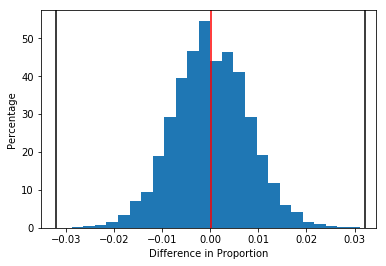

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.hist(bs_replicates, bins = 25, normed=True)
plt.xlabel('Difference in Proportion')
plt.ylabel('Percentage')
plt.axvline(x=np.mean(bs_replicates), color='r')
plt.axvline(x=lower_bound, color='k')
plt.axvline(x=upper_bound, color='k')
plt.show()

In [34]:
p1 = np.sum(bs_replicates <= lower_bound)/len(bs_replicates)
p2 = np.sum(bs_replicates >= upper_bound)/len(bs_replicates)
p_val = p1 + p2

print ('The p-value obtained from running the bootstrap hypothesis test for this dataset is %f' %p_val)

The p-value obtained from running the bootstrap hypothesis test for this dataset is 0.000000


Since the p-value obtained from the bootstrap hypothesis test is lower than alpha = 0.05, we reject the null hypothesis. Therefore, there is statistical significant evidence that the number of callbacks that white-sounding names receive is greater than the number of callbacks that black-sounding names receive.

### Q4: Write a story describing the statistical significance in the context or the original problem.

Based on the statistical analysis conducted in this study using both frequentist test and bootstrap hypothesis test,there is statistical significant evidence that the number of callbacks that white-sounding names receive is greater than the number of callbacks that black-sounding names receive.

+ In the case of the frequentist test, the obtained p-value is 0.0000398, which is much less than alpha/2 and hence we can reject the null hypothesis. In other words, if the null hypothesis were true then there is only 0.00398% chance of the observed data being sampled. 
+ In the case of the bootstrap hypothesis test, there is a 0% chance that the null hypothesis is true when being compared to the true difference in proportion between two groups. Hence, the null hypothesis is also rejected. 

### Q5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis does not mean that race/name is the most important factor in callback success since hypothesis testing does not lead to causation in any statistical scenario. Instead, the analysis helps to point out that there is a chance that the number of callbacks white-sounding names receive is different from the number of callbacks black-sounding names receive.  